In [9]:
import torch
a=torch.tensor([4,3], dtype=torch.float16)
print(a,a.dtype)

tensor([4., 3.], dtype=torch.float16) torch.float16


In [23]:
b=torch.ones(5,4)
c=torch.rand(4,4)
print(b@c)
print(b,b.dtype)

tensor([[2.5945, 2.2458, 1.9470, 2.1886],
        [2.5945, 2.2458, 1.9470, 2.1886],
        [2.5945, 2.2458, 1.9470, 2.1886],
        [2.5945, 2.2458, 1.9470, 2.1886],
        [2.5945, 2.2458, 1.9470, 2.1886]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) torch.float32


In [26]:
print(torch.Tensor([1.3,4,2]))

tensor([1.3000, 4.0000, 2.0000])


In CPU tensors share same memory location so if we change one variable associated with other, the other one also changes.
We can use .clone() to avoid having same memory location

In [37]:
b=a.view(-1)
c=a.clone()
b[1]=21
c[1]=23
print(a)
print(b)
print(c)


tensor([ 4., 21.], dtype=torch.float16)
tensor([ 4., 21.], dtype=torch.float16)
tensor([ 4., 23.], dtype=torch.float16)


`Gradients`

In [55]:
x=torch.randn(3,requires_grad=True)
y=x**3
print(x)
print(y)
z=y**2+y
print(z)



tensor([ 0.8969,  0.0696, -0.5814], requires_grad=True)
tensor([ 7.2150e-01,  3.3753e-04, -1.9653e-01], grad_fn=<PowBackward0>)
tensor([ 1.2421e+00,  3.3765e-04, -1.5791e-01], grad_fn=<AddBackward0>)


In [57]:
z=z.mean()
print(z)
z.backward()
print(x.grad)

tensor(0.3615, grad_fn=<MeanBackward0>)
tensor([1.9652, 0.0049, 0.2052])


We Need to update the grad to 0 after every epoch we use optimizer.zero_grad()

In [59]:
a=torch.randn(3,requires_grad=True)
b=a.detach()
print(a.requires_grad)
print(b.requires_grad)
b.requires_grad_(True)
print(b.requires_grad)

True
False
True


In [61]:
a=torch.randn(3,4 ,requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b=a+3
    print(b.requires_grad)



True
False


In [80]:
v=torch.randn(2,2)
k=torch.ones(2,2)
print(v@k)
print(torch.mm(v,k))

tensor([[-0.5387, -0.5387],
        [ 2.3877,  2.3877]])
tensor([[-0.5387, -0.5387],
        [ 2.3877,  2.3877]])


Calculating grad for y=x*2

In [27]:
import torch 
import torch.nn as nn


X=torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8]],dtype=torch.float32)
Y=torch.tensor([[3],[6],[9],[12],[15],[18],[21],[24]],dtype=torch.float32)

n_samples,n_features=X.shape
input_size=n_features
output_size=n_features

class linearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(linearRegression,self).__init__()
        self.lin=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)

model=linearRegression(input_size,output_size)
learning_rate=0.01
n_epochs=100
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_epochs):
    y_pred=model(X)

    loss=criterion(Y,y_pred)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

   
    if (epoch+1)%10==0:
        w,b=model.parameters()
        print(f"epoch {epoch+1} : w = {w[0][0].item():.3f} , loss = {loss.item():.3f}")
    

X_test=torch.tensor([[10]],dtype=torch.float32)

print(f'Prediction after training {X_test} = {model(X_test).item():.3f}')


epoch 10 : w = 3.020 , loss = 0.004
epoch 20 : w = 3.021 , loss = 0.003
epoch 30 : w = 3.020 , loss = 0.003
epoch 40 : w = 3.019 , loss = 0.002
epoch 50 : w = 3.018 , loss = 0.002
epoch 60 : w = 3.018 , loss = 0.002
epoch 70 : w = 3.017 , loss = 0.002
epoch 80 : w = 3.016 , loss = 0.002
epoch 90 : w = 3.016 , loss = 0.002
epoch 100 : w = 3.015 , loss = 0.001
Prediction after training tensor([[10.]]) = 30.066


*Linear Regression in PyTorch*

epoch 100 : w = 65.574 , loss = 563.803
epoch 200 : w = 78.981 , loss = 342.565
epoch 300 : w = 81.753 , loss = 333.009
epoch 400 : w = 82.331 , loss = 332.587
epoch 500 : w = 82.452 , loss = 332.568
epoch 600 : w = 82.478 , loss = 332.568
epoch 700 : w = 82.483 , loss = 332.568
epoch 800 : w = 82.484 , loss = 332.568
epoch 900 : w = 82.484 , loss = 332.568
epoch 1000 : w = 82.484 , loss = 332.568


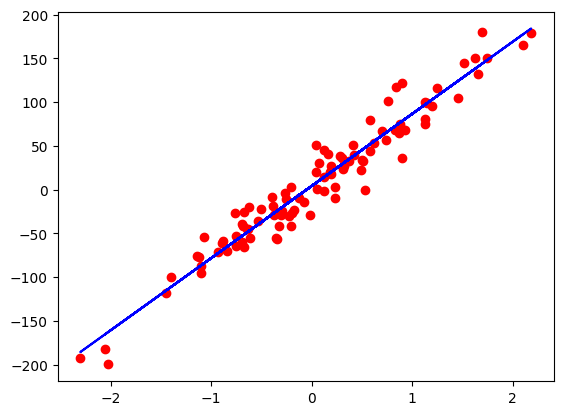

In [34]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

#Dataset init
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

n_samples,n_features=X.shape
input_size=n_features
output_size=n_features

#Model
class LinearReg(nn.Module):
    def __init__(self,input_dim,output_dim ):
        super(LinearReg,self).__init__()
        self.lin=nn.Linear(input_dim,output_dim)
    def forward(self,X):
        return self.lin(X)
    
model=LinearReg(input_size,output_size)

#Training
learning_rate=0.01
n_epochs=1000
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_epochs):
    y_pred=model(X)

    loss=criterion(y_pred,y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if((epoch+1)%100==0):
        w,b=model.parameters()
        print(f'epoch {epoch+1} : w = {w[0][0]:.3f} , loss = {loss.item():.3f}')


#Test

predicted=model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()



*Logistic Regression in PyTorch*

In [52]:
import torch
import torch.nn as nn 
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc= datasets.load_breast_cancer()
X,y= bc.data , bc.target

n_samples,n_features= X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 , random_state=1234)


#Scaling Features (Always scale for logistic regression)

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

#Model
class LogisticReg(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticReg,self).__init__()
        self.lin=nn.Linear(n_input_features,1)

    def forward(self,x):
        return torch.sigmoid(self.lin(x))
    
model=LogisticReg(n_features)

#loss criterion & optimizer
learning_rate=0.05
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

#Training
n_epochs=1000
for epoch in range(n_epochs):

    #forward pass
    y_pred=model(X_train)

    #loss
    loss=criterion(y_pred,y_train)

    #backprop
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    if((epoch+1)%100==0):
        w,b=model.parameters()
        print(f'epoch {epoch+1} : w = {w[0][0]:.3f} , loss = {loss.item():.3f}')


#Eval
with torch.no_grad():
    y_predicted= model(X_test)
    y_predicted_cls=y_predicted.round()
    acc= y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'Accuracy {acc*100:.3f} %')
 


epoch 100 : w = -0.381 , loss = 0.115
epoch 200 : w = -0.458 , loss = 0.087
epoch 300 : w = -0.503 , loss = 0.075
epoch 400 : w = -0.535 , loss = 0.068
epoch 500 : w = -0.560 , loss = 0.063
epoch 600 : w = -0.580 , loss = 0.059
epoch 700 : w = -0.597 , loss = 0.056
epoch 800 : w = -0.612 , loss = 0.054
epoch 900 : w = -0.626 , loss = 0.052
epoch 1000 : w = -0.638 , loss = 0.050
Accuracy 96.491 %


*Datasets & Dataloader*

In [35]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        xy=np.loadtxt('../Datasets/wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x=torch.from_numpy(xy[:,1:])
        self.y=torch.from_numpy(xy[:,[0]])
        self.n_samples=xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
    

dataset=WineDataset()
dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True, num_workers=0)
'''
dataiter=iter(dataloader)
data=next(dataiter)

features,labels=data
print(features ,labels)
'''


#Sample Training

n_epochs=2
batch_size=4
total_samples=len(dataset)
n_iter=math.ceil(total_samples/batch_size)

for epoch in range(n_epochs):
    for i,(inputs,labels) in enumerate(dataloader):
        if (i+1)%5==0:
            print(f'Epoch {epoch+1}/{n_epochs}  Step {i+1}/{n_iter} Input size: {inputs.shape} ')


Epoch 1/2  Step 5/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 10/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 15/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 20/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 25/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 30/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 35/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 40/45 Input size: torch.Size([4, 13]) 
Epoch 1/2  Step 45/45 Input size: torch.Size([2, 13]) 
Epoch 2/2  Step 5/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 10/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 15/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 20/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 25/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 30/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 35/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 40/45 Input size: torch.Size([4, 13]) 
Epoch 2/2  Step 45/45 Input size: torch.Size([2, 13]) 


*Dataset Transforms*

In [49]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self,transform):
        xy=np.loadtxt('../Datasets/wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x=xy[:,1:]
        self.y=xy[:,[0]]
        self.n_samples=xy.shape[0]
        self.transform=transform

    def __getitem__(self, index):
        sample= self.x[index], self.y[index]
        if(self.transform):
            sample=self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_samples
    
class ToTensor:
    def __call__(self,sample):
        inputs,targets=sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self,factor):
        self.factor=factor

    def __call__(self, sample):
        inputs,targets=sample
        inputs*=self.factor
        return inputs,targets
        

dataset=WineDataset(transform=ToTensor())
first_data=dataset[0]
features,labels=first_data
print(features)


composed=torchvision.transforms.Compose([ToTensor(),MulTransform(4)])
dataset=WineDataset(transform=composed)
fist_data=dataset[0]
features,labels=fist_data
print(features)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])


*Activation Functions*

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,):
        super(NeuralNet,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(hidden_size,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        out=self.linear1(x)
        out=self.relu(out)
        out=self.linear2(out)
        out=self.sigmoid(out)
        return out
    


*MNIST Dataset Implementation*

In [78]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tranforms
import matplotlib.pyplot as plt

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Hyper-Parameters
input_size=784 #28x28
hidden_size= 100
num_classes=10
n_epochs=2
batch_size=100
learning_rate=0.001


#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=tranforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=tranforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)


'''
example = iter(train_loader)
features, labels = next(example)
print(features.shape, labels.shape)


for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(features[i][0],cmap='gray')
plt.show()
'''


#Model
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
    
model=NeuralNet(input_size,hidden_size,num_classes)

#Softmax is automatically applied in cross entropy loss
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#Training

n_total_steps=len(train_loader)

for epoch in range(n_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)

        #forwardpass
        output=model(images)

        #backprop
        loss=criterion(output,labels)
        loss.backward()

        #optimizer
        optimizer.step()
        optimizer.zero_grad()

        if(i+1)%5==0:
            print(f'Epoch:{epoch+1}/{n_epochs} Step:{i+1}/{n_total_steps} Loss:{loss.item():.4f}')


#Testing

with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        output=model(images)

        _,predictions=torch.max(output,1)

        n_samples+=labels.shape[0]
        n_correct+= (predictions==labels).sum().item()

    acc=n_correct/n_samples
    print(f'Accuracy {acc*100:.4f} %')




Epoch:1/2 Step:5/600 Loss:2.1543
Epoch:1/2 Step:10/600 Loss:1.8823
Epoch:1/2 Step:15/600 Loss:1.7131
Epoch:1/2 Step:20/600 Loss:1.5081
Epoch:1/2 Step:25/600 Loss:1.2736
Epoch:1/2 Step:30/600 Loss:1.1447
Epoch:1/2 Step:35/600 Loss:1.0610
Epoch:1/2 Step:40/600 Loss:0.7736
Epoch:1/2 Step:45/600 Loss:0.8556
Epoch:1/2 Step:50/600 Loss:0.6973
Epoch:1/2 Step:55/600 Loss:0.6889
Epoch:1/2 Step:60/600 Loss:0.6652
Epoch:1/2 Step:65/600 Loss:0.6188
Epoch:1/2 Step:70/600 Loss:0.5934
Epoch:1/2 Step:75/600 Loss:0.4840
Epoch:1/2 Step:80/600 Loss:0.5808
Epoch:1/2 Step:85/600 Loss:0.5770
Epoch:1/2 Step:90/600 Loss:0.4038
Epoch:1/2 Step:95/600 Loss:0.4501
Epoch:1/2 Step:100/600 Loss:0.5330
Epoch:1/2 Step:105/600 Loss:0.4751
Epoch:1/2 Step:110/600 Loss:0.4349
Epoch:1/2 Step:115/600 Loss:0.4616
Epoch:1/2 Step:120/600 Loss:0.4138
Epoch:1/2 Step:125/600 Loss:0.3277
Epoch:1/2 Step:130/600 Loss:0.5053
Epoch:1/2 Step:135/600 Loss:0.3803
Epoch:1/2 Step:140/600 Loss:0.4669
Epoch:1/2 Step:145/600 Loss:0.3176
Epoch